In [1]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mat = scipy.io.loadmat('ex4data1.mat')  #loading the dataset which is same as the previous assignment

In [3]:
mat #to show the data in detailed manner
#mat['X'].shape
#mat['y'].shape  #to check the shapes

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

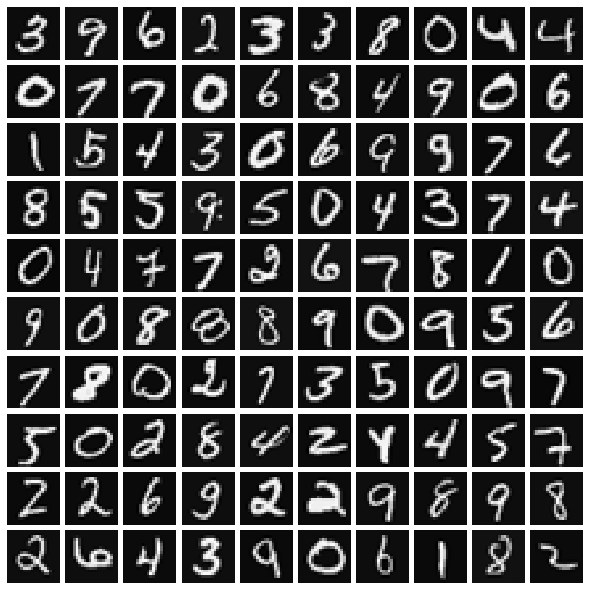

In [4]:
rows = 10  #as the data set is same we there are 5000 rows with each row having a image with 400 columns 
cols = 10  #we also know that there are 10 different digits
fig = plt.figure(figsize=(8,8))
indexes = np.random.choice(5000, rows*cols) # to randomly choose 100 rows from our dataset of 5000 rows
count = 0
for i in range(0,rows):
    for j in range(0,cols):
        ax1 = fig.add_subplot(rows, cols, count+1) #this creates a subplot of 100 places
        ax1.imshow(mat['X'][indexes[count]].reshape((20,20), order='F'), cmap='gray') #this is show the image from the matrix form by reshaping the 400 coulmn data to 20*20 matrix 
        ax1.set_axis_off() #this is to remove the axis from the images
        count+=1
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1) #To tune the subplot layout in a proper manner
plt.show()

In [5]:
#MODEL REPRESENTATION
#Our neural network has:
#3 layers: an input layer, a hidden layer and an output layer
#400 input layer units (because the images are of size $20 \times 20$
#25 units in the second layer
#10 output units (corresponding to the 10 digit classes)"

In [6]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

In [7]:
mat_weights = scipy.io.loadmat('ex4weights.mat')
mat_weights['Theta1'].shape, mat_weights['Theta2'].shape

((25, 401), (10, 26))

In [8]:
#Unroll parameters
nn_params = np.hstack((mat_weights['Theta1'].ravel(order='F'), # order 'F' defines the column wise flatening
                       mat_weights['Theta2'].ravel(order='F'))) #ravel is used to flatten the matrix into 1-D & hstack horizontally stacks the different matrices together

In [ ]:
#FEED FORWARD and COST FUNCTION

In [9]:
def sigmoid(z):
    z = np.array(z)
    return 1 / (1+np.exp(-z))

In [36]:
def nn_cost_function1(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y):
    
    theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size+1)], newshape=(hidden_layer_size, input_layer_size+1), order='F')
    theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size+1):], newshape=(num_labels, hidden_layer_size+1), order='F')
    
    m = X.shape[0]
    J = 0
    
    K = num_labels
    X = np.hstack((np.ones((m,1)),X)) #add bias unit

    for i in range(m):
        a1 = X[i]
        
        z2 = np.dot(a1,theta1.T)
        a2 = sigmoid(z2)
        a2 = np.hstack([1, a2]) ##add bias unit
        
        z3 = np.dot(a2,theta2.T)
        a3 = sigmoid(z3)
        
        h = a3
        
        yk = np.zeros((K,1)) ##y is as K-dimensional vector
        yk[y[i,0]-1, 0] = 1
        
        j = (-np.dot(yk.T,np.log(h).T) - np.dot((1-yk).T,np.log(1-h).T))
        J = J + (j/m)
    return J

In [37]:
J = nn_cost_function1(nn_params, input_layer_size, hidden_layer_size, num_labels, mat['X'], mat['y'])
print('Cost at parameters (loaded from ex4weights): {0} \n(this value should be about 0.287629)'.format(J))

Cost at parameters (loaded from ex4weights): [0.28762917] 
(this value should be about 0.287629)


In [34]:
#Regularized Cost Function
def nn_cost_function2(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r):
    
    theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size+1)], newshape=(hidden_layer_size, input_layer_size+1), order='F')
    theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size+1):], newshape=(num_labels, hidden_layer_size+1), order='F')
    
    m = X.shape[0]
    J = 0
    
    K = num_labels
    X = np.hstack((np.ones((m,1)),X)) #add bias unit

    for i in range(m):
        a1 = X[i]
        
        z2 = a1.dot(theta1.T)
        a2 = sigmoid(z2)
        a2 = np.hstack([1, a2]) ##add bias unit
        
        z3 = a2.dot(theta2.T)
        a3 = sigmoid(z3)
        
        h = a3
        
        yk = np.zeros((K,1)) ##y is as K-dimensional vector
        yk[y[i,0]-1, 0] = 1
        
        j = (-yk.T.dot(np.log(h).T) - (1-yk).T.dot(np.log(1-h).T)) ##sum of K
        J = J + (j/m) #sum of i
        
    sum1 = np.sum(np.sum(theta1[:, 1:] ** 2))
    sum2 = np.sum(np.sum(theta2[:, 1:] ** 2)) #As there are 2 thetas
    J = J + (lambda_r / (2*m)) * (sum1 + sum2)
    return J

In [35]:
lambda_r = 1

J = nn_cost_function2(nn_params, input_layer_size, hidden_layer_size, num_labels, mat['X'], mat['y'], lambda_r)
print('Cost at parameters (loaded from ex4weights): {0} \n(this value should be about 0.383770)'.format(J))

Cost at parameters (loaded from ex4weights): [0.38376986] 
(this value should be about 0.383770)


In [38]:
#BACKPROPAGATION
def sigmoid_gradient(z):
    return sigmoid(z) * (1-sigmoid(z))  #differentiation of sigmoid function



#Random initialization
epsilon_init = 0.12
initial_theta1 = np.random.uniform(low=-epsilon_init, high=epsilon_init, size=(hidden_layer_size, input_layer_size+1))
initial_theta2 = np.random.uniform(low=-epsilon_init, high=epsilon_init, size=(num_labels, hidden_layer_size+1))




def nn_cost_function3(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r):
    
    theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size+1)], newshape=(hidden_layer_size, input_layer_size+1), order='F')
    theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size+1):], newshape=(num_labels, hidden_layer_size+1), order='F')
    
    m = X.shape[0]
    J = 0
    
    K = num_labels
    X = np.hstack((np.ones((m,1)),X)) #add bias unit

    capital_delta1 = np.zeros(theta1.shape)
    capital_delta2 = np.zeros(theta2.shape)
    
    for i in range(m):
        a1 = X[i]
        
        z2 = np.dot(a1,theta1.T)
        a2 = sigmoid(z2)
        a2 = np.hstack([1, a2]) ##add bias unit
        
        z3 = np.dot(a2,theta2.T)
        a3 = sigmoid(z3)
        
        h = a3
        
        yk = np.zeros((K,1)) ##y is as K-dimensional vector
        yk[y[i,0]-1, 0] = 1
        
        j = (-np.dot(yk.T,np.log(h).T) - np.dot((1-yk).T,np.log(1-h).T)) ##sum of K
        J = J + (j/m) #sum of i
        
        delta3 = a3 - yk.T
        
        z2 = np.hstack([1, z2]) ##add bias unit
        delta2 = np.dot(theta2.T,delta3.T) * (sigmoid_gradient(z2).reshape(-1,1))
        
        capital_delta1 = capital_delta1 + (np.dot(delta2[1:,:],a1.reshape(1,-1)))
        capital_delta2 = capital_delta2 + (np.dot(delta3.T,a2.reshape(1,-1)))
        
    sum1 = np.sum(np.sum(theta1[:, 1:] ** 2))
    sum2 = np.sum(np.sum(theta2[:, 1:] ** 2))
    J = J + (lambda_r / (2*m)) * (sum1 + sum2)
    
    theta1_grad = (1/m) * (capital_delta1 + lambda_r * theta1) #with regularization
    theta1_grad[:,0] = ((1/m) * capital_delta1)[:,0]
    
    theta2_grad = (1/m) * (capital_delta2 + lambda_r * theta2) #with regularization
    theta2_grad[:,0] = ((1/m) * capital_delta2)[:,0]
    
    grad = np.hstack((theta1_grad.ravel(order='F'), theta2_grad.ravel(order='F')))
    return J, grad


In [39]:
#Gradient Checking
def compute_numerical_gradient(theta, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r):
    e = 0.0001
    num_grad = np.zeros(theta.shape)
    perturb = np.zeros(theta.shape)
    for p in range(len(theta)):
        perturb[p] = e
        loss1, _ = nn_cost_function3(theta-perturb, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r)
        loss2, _ = nn_cost_function3(theta+perturb, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r)
        num_grad[p] = (loss2-loss1)/(2*e)
        perturb[p] = 0
    return num_grad

In [40]:
def debug_initialize_weights(fan_out, fan_in):
    W = np.zeros((fan_out, 1+fan_in))
    W = np.reshape(range(len(W.ravel(order='F'))), W.shape)/10
    return W

In [43]:
def check_nn_gradients(lambda_r=0):
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5
    
    theta1 = debug_initialize_weights(hidden_layer_size, input_layer_size)
    theta2 = debug_initialize_weights(num_labels, hidden_layer_size)
    
    X = debug_initialize_weights(m, input_layer_size-1)
    y = 1 + np.mod(range(m), num_labels).reshape(-1, 1)
    
    nn_params = np.hstack((theta1.ravel(order='F'), theta2.ravel(order='F')))
    
    cost, grad = nn_cost_function3(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r)
    num_grad = compute_numerical_gradient(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r)
    
    print('The columns should be very similar...')
    for i, j in zip(num_grad, grad):
        print(i,j)
        
    diff = np.linalg.norm(num_grad-grad)/np.linalg.norm(num_grad+grad)
    if diff < 0.000000010:
        print('\nBackpropagation is correct')
    else:
        print('\nBackpropagation is incorrect')

In [44]:
check_nn_gradients()

The columns should be very similar...
0.3508102791105472 0.35081027824835614
0.2353522188158763 0.23535221882914448
0.1452979107607888 0.14529791114175525
0.09315199914539107 0.09315199923194291
0.06032069570061083 0.06032069599693199
0.1937398015439129 0.19373980185067552
0.08735383096869498 0.08735383078360323
0.029773973508895324 0.029773974437035562
0.010590364460938417 0.010590364574492521
0.004047666530837546 0.00404766588020231
0.2288208313494522 0.22882082967551112
0.11088905266909421 0.11088905266651768
0.044303765989184285 0.04430376555121108
0.019905564396793807 0.01990556449768681
0.010079735703882875 0.010079735479895512
0.26390185717595216 0.2639018575003467
0.1344242739431678 0.13442427454943215
0.058833556648707486 0.0588335566653866
0.029220764217186 0.029220764420881108
0.01611180537430812 0.01611180507958871
0.39622224609736634 0.3962222462654107
0.5887339968513317 0.588733996850061
0.7994663673738245 0.7994663670394307
0.24984228291557997 0.2498422829571028
0.349065

In [46]:
lambda_r = 3
check_nn_gradients(lambda_r)
J, grad = nn_cost_function3(nn_params, input_layer_size, hidden_layer_size, num_labels, mat['X'], mat['y'], lambda_r)
print('Cost at parameters (loaded from ex4weights): {0} \n(this value should be about 0.576051)'.format(J))

The columns should be very similar...
0.35081027911942897 0.35081027824835614
0.2353522188158763 0.23535221882914448
0.145297910751907 0.14529791114175525
0.09315199914539107 0.09315199923194291
0.06032069569172904 0.06032069599693199
0.2537398015434178 0.2537398018506755
0.38735383096621945 0.38735383078360325
0.5697739734955576 0.5697739744370356
0.7905903644456203 0.7905903645744927
1.0240476665224207 1.0240476658802022
0.348820831348462 0.34882082967551115
0.47088905267500536 0.4708890526665177
0.6443037660019968 0.6443037655512112
0.8599055643898623 0.8599055644976867
1.0900797357216163 1.0900797354798957
0.44390185717446684 0.4439018575003467
0.5544242739397021 0.5544242745494321
0.7188335566432613 0.7188335566653867
0.9292207642097594 0.9292207644208812
1.1561118053826647 1.1561118050795887
0.39622224608848455 0.3962222462654107
0.5887339968602134 0.588733996850061
0.7994663673827063 0.7994663670394307
0.30984228292396665 0.3098422829571028
0.7690656134862195 0.769065613486773
1

In [50]:
#Learning Parameters - Training the neural network
import scipy.optimize as opt
lambda_r = 1
opt_results = opt.minimize(nn_cost_function3, nn_params, args=(input_layer_size, 
                                                              hidden_layer_size, 
                                                              num_labels, 
                                                              mat['X'], 
                                                              mat['y'], 
                                                              lambda_r), 
                            method='L-BFGS-B', jac=True, options={'maxiter':50})

In [55]:
opt_results

      fun: array([0.31722116])
 hess_inv: <10285x10285 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.31088680e-04, -9.15347261e-05, -6.81873625e-05, ...,
       -4.79810736e-05, -2.89538852e-05,  2.21663570e-05])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 55
      nit: 50
   status: 1
  success: False
        x: array([-0.06388654, -0.13010792,  0.50133758, ..., -2.95836945,
       -2.87425683, -1.74870182])

In [53]:
theta1 = np.reshape(opt_results['x'][:hidden_layer_size * (input_layer_size+1)], newshape=(hidden_layer_size, input_layer_size+1), order='F')
theta2 = np.reshape(opt_results['x'][hidden_layer_size * (input_layer_size+1):], newshape=(num_labels, hidden_layer_size+1), order='F')

In [57]:
def predict_nn(theta1, theta2, X):
    m, n = X.shape
    a1 = np.hstack((np.ones((m,1)),X)) #with a0
    
    z2 = np.dot(a1,theta1.T)
    a2 = sigmoid(z2)
    
    z3 = np.dot( np.hstack((np.ones((m,1)),a2)),theta2.T) #with a0
    a3 = sigmoid(z3)
    h = np.argmax(a3, axis=1)+1 #get label with largest h(x)
    
    return h

In [64]:
y_pred = predict_nn(theta1, theta2, mat['X'])
accuracy = np.mean(y_pred == mat['y'].T)
print('Train accuracy:', accuracy * 100,'%')

Train accuracy: 99.24 %


In [68]:
#similiar code using Scikit-learn
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), activation='logistic', solver='lbfgs', alpha=1, max_iter=50)
nn.fit(mat['X'], mat['y'].T[0])

C:\Users\Subhojit Misra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(25,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [69]:
nn.score(mat['X'], mat['y'].T[0])

0.982

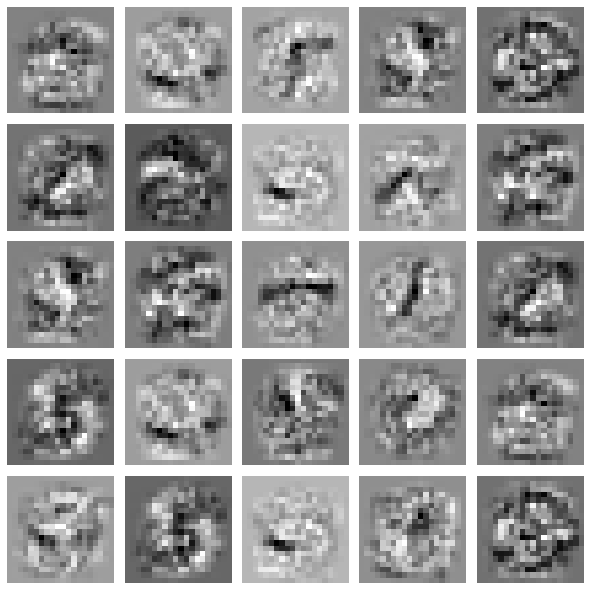

In [72]:
#Visualizing the hidden layer
rows = 5
cols = 5
fig = plt.figure(figsize=(8,8))
indexes = np.random.choice(25, rows*cols)
count = 0
for i in range(0,rows):
    for j in range(0,cols):
        ax1 = fig.add_subplot(rows, cols, count+1)
        ax1.imshow(theta1[:,1:][indexes[count]].reshape((20,20), order='F'), cmap='gray')
        ax1.set_axis_off()
        count+=1
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()